In [72]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

import datetime

plt.rcParams.update({'font.size': 32})

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

In [7]:
DKI1.loc[1840] = [pd.Timestamp('2022-01-15 00:00:00'), 'DKI1 (Bunderan HI)', 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 'PM10', 'SEDANG']

In [8]:
DKI1

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),0.719512,0.314286,0.458333,0.092308,0.012821,0.300518,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),0.146341,0.295238,0.270833,0.082051,0.000000,0.139896,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),0.170732,0.295238,0.291667,0.087179,0.012821,0.139896,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),0.243902,0.295238,0.395833,0.087179,0.012821,0.139896,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),0.304878,0.295238,0.458333,0.056410,0.012821,0.139896,SO2,Baik
...,...,...,...,...,...,...,...,...,...,...
1822,2021-12-28,DKI1 (Bunderan HI),0.573171,0.495238,0.250000,0.076923,0.153846,0.310881,PM25,SEDANG
1823,2021-12-29,DKI1 (Bunderan HI),0.329268,0.504762,0.145833,0.107692,0.128205,0.253886,SO2,SEDANG
1824,2021-12-30,DKI1 (Bunderan HI),0.621951,0.495238,0.270833,0.102564,0.166667,0.341969,PM25,SEDANG
1825,2021-12-31,DKI1 (Bunderan HI),0.707317,0.485714,0.416667,0.087179,0.166667,0.414508,PM25,SEDANG


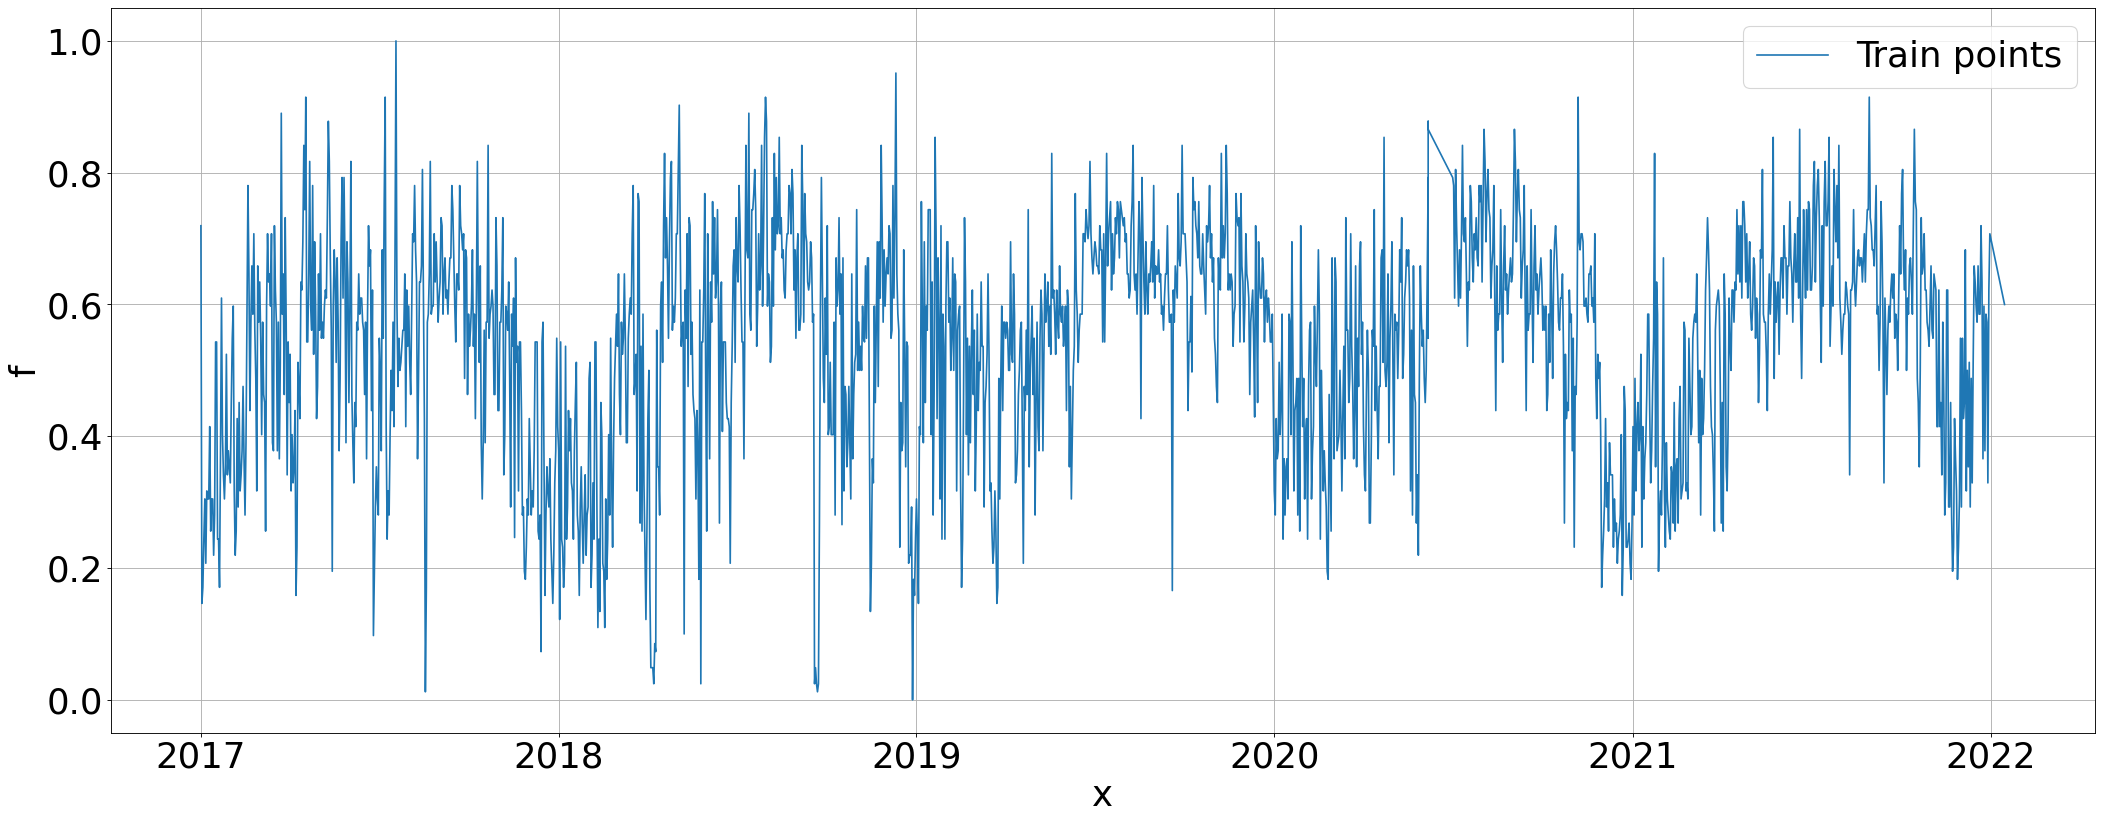

In [10]:
train_X, train_Y = np.array(DKI1.index).reshape(-1, 1), np.array(DKI1['PM10']).reshape(-1, 1)

# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[train_X.flatten()]).reshape(-1,1), train_Y, mew=2, label='Train points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [11]:
k8 = GPy.kern.Brownian(1)
m8 = GPy.models.GPRegression(train_X, train_Y, k8)
m8.optimize(messages=1, ipython_notebook=True)

In [12]:
plt.rc('figure', figsize=(64, 24), dpi=240)
m8.plot()
ax = plt.gca()
ax.plot(train_X, train_Y, color="green", mew=2, label="Train points")
# ax.plot(test_X, test_Y, "mo", mew=2, label="Test points")

ax.legend()

In [19]:
train_X

array([[   0],
       [   1],
       [   2],
       ...,
       [1824],
       [1825],
       [1840]], dtype=int64)

In [70]:
test_X = np.arange(1826, 1857, dtype=np.int64)
test_X = np.reshape(test_X, (-1, 1))
test_X

array([[1826],
       [1827],
       [1828],
       [1829],
       [1830],
       [1831],
       [1832],
       [1833],
       [1834],
       [1835],
       [1836],
       [1837],
       [1838],
       [1839],
       [1840],
       [1841],
       [1842],
       [1843],
       [1844],
       [1845],
       [1846],
       [1847],
       [1848],
       [1849],
       [1850],
       [1851],
       [1852],
       [1853],
       [1854],
       [1855],
       [1856]], dtype=int64)

In [71]:
test_Y = m8.predict(test_X)[0].flatten()
test_Y

array([0.58484918, 0.58559457, 0.58633995, 0.58708534, 0.58783073,
       0.58857612, 0.5893215 , 0.59006689, 0.59081228, 0.59155767,
       0.59230306, 0.59304844, 0.59379383, 0.59453922, 0.59528461,
       0.59528461, 0.59528461, 0.59528461, 0.59528461, 0.59528461,
       0.59528461, 0.59528461, 0.59528461, 0.59528461, 0.59528461,
       0.59528461, 0.59528461, 0.59528461, 0.59528461, 0.59528461,
       0.59528461])

In [96]:
# Denormalisasi
max = 86.0
min = 4.0
test_Y_denorm = (test_Y.flatten() * (max - min) + min)
test_Y_denorm

array([51.95763259, 52.01875438, 52.07987618, 52.14099798, 52.20211978,
       52.26324158, 52.32436337, 52.38548517, 52.44660697, 52.50772877,
       52.56885056, 52.62997236, 52.69109416, 52.75221596, 52.81333776,
       52.81333776, 52.81333776, 52.81333776, 52.81333776, 52.81333776,
       52.81333776, 52.81333776, 52.81333776, 52.81333776, 52.81333776,
       52.81333776, 52.81333776, 52.81333776, 52.81333776, 52.81333776,
       52.81333776])

In [92]:
start = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")
date_generated = pd.date_range(start, periods=31)
# print(date_generated.strftime("%Y-%m-%d"))
date_generated

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [97]:
d = {"Tanggal":date_generated, "PM10":test_Y_denorm}
DKI1_Forecasting = pd.DataFrame(d)
DKI1_Forecasting

,Tanggal,PM10
0,2022-01-01,51.957633
1,2022-01-02,52.018754
2,2022-01-03,52.079876
3,2022-01-04,52.140998
4,2022-01-05,52.202120
5,2022-01-06,52.263242
6,2022-01-07,52.324363
7,2022-01-08,52.385485
8,2022-01-09,52.446607
9,2022-01-10,52.507729


In [98]:
# Penyimpanan Data Forecasting
DKI1_Forecasting.to_excel('./Data/Forecasting/DKI1.xlsx', index=False)